<a href="https://colab.research.google.com/github/tranpeter000/Books-main/blob/main/Day_1_Quantum%20Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On Paused. Need to read up on Quantum Teleportation.

# Quantum Teleportation
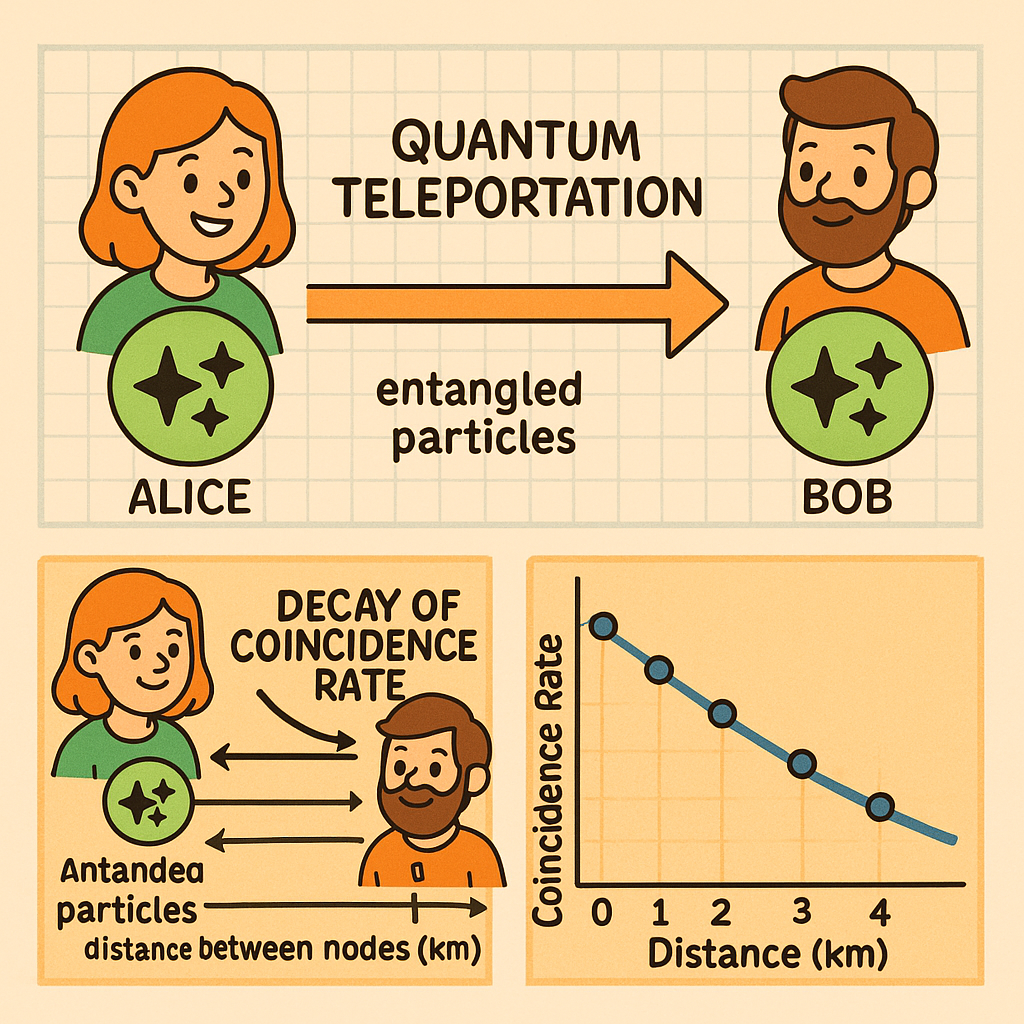

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV

In [ ]:
# Load CSV
df = pd.read_csv("/CSV/fig4a_TT(opt).csv")
df.head()

,distance between end nodes (km),coincidence rate
0,0.0,1010.423682
1,1.0,871.217491
2,2.0,761.881760
3,3.0,673.822755
4,4.0,601.452926


In [ ]:
# Create the dataset
data = {
    "distance_km": [0, 1, 2, 3, 4],
    "coincidence_rate": [1010.423682, 871.217491, 761.881760, 673.822755, 601.452926]
}
df = pd.DataFrame(data)

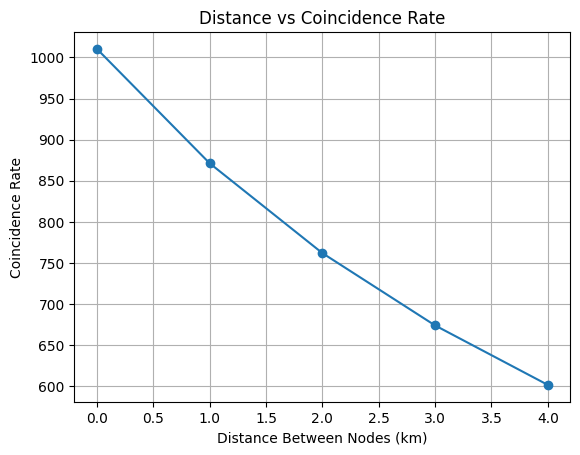

In [ ]:
# Plot the data to see the trend

plt.plot(df["distance_km"], df["coincidence_rate"], marker="o")
plt.title("Distance vs Coincidence Rate")
plt.xlabel("Distance Between Nodes (km)")
plt.ylabel("Coincidence Rate")
plt.grid(True)
plt.show()


As the distance between nodes increases, the coincidence rate decreases steadily.
This suggests that quantum teleportation efficiency drops with distance, likely due to signal loss or environmental noise

# Basic Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance_km       5 non-null      int64  
 1   coincidence_rate  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


In [ ]:
df.describe()

,distance_km,coincidence_rate
count,5.000000,5.000000
mean,2.000000,783.759723
std,1.581139,161.884188
min,0.000000,601.452926
25%,1.000000,673.822755
50%,2.000000,761.881760
75%,3.000000,871.217491
max,4.000000,1010.423682


# Analyze Fidelity (Quality of Teleportation)

In [ ]:
print(df.columns.tolist())

['distance_km', 'coincidence_rate']


# Calculate the percentage drop per kilometer

In [ ]:
# from previous row
df["percent_drop"] = (df["coincidence_rate"].pct_change() * 100)
df

,distance_km,coincidence_rate,percent_drop
0,0,1010.423682,NaN
1,1,871.217491,-13.777012
2,2,761.881760,-12.549763
3,3,673.822755,-11.558093
4,4,601.452926,-10.740188


.pct_change()tells you how much change happened between rows (as a %)

# Plot the drop per km

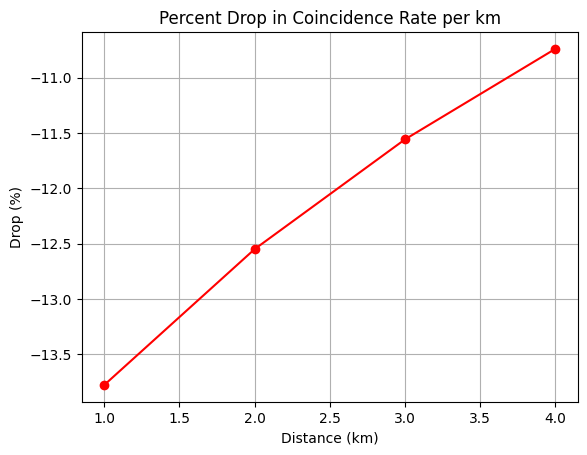

In [ ]:
# Plot the % drop
plt.plot(df["distance_km"], df["percent_drop"], marker="o", color="red")
plt.title("Percent Drop in Coincidence Rate per km")
plt.xlabel("Distance (km)")
plt.ylabel("Drop (%)")
plt.grid(True)
plt.show()

# Regression Line
 to predict how the rate continues to drop

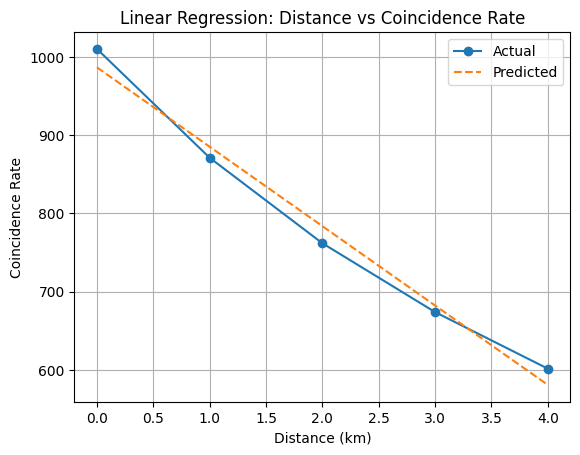

In [ ]:
# Simple linear regression
from sklearn.linear_model import LinearRegression

# Reshape X to be 2D for sklearn
X = df[["distance_km"]]
y = df["coincidence_rate"]

model = LinearRegression()
model.fit(X, y) 10

# Predict
df["predicted_rate"] = model.predict(X)

# Plot actual vs predicted
plt.plot(df["distance_km"], df["coincidence_rate"], marker="o", label="Actual")
plt.plot(df["distance_km"], df["predicted_rate"], linestyle="--", label="Predicted")
plt.title("Linear Regression: Distance vs Coincidence Rate")
plt.xlabel("Distance (km)")
plt.ylabel("Coincidence Rate")
plt.legend()
plt.grid(True)
plt.show()